<a href="https://colab.research.google.com/github/aleksanderprofic/Machine-Learning/blob/master/ReinforcementLearning/MultiArmedBanditProblem/ThompsonSampling/ads_ctr_optimisation_thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


We would like to choose the most profitable ad out of 10 available. 

We are going to do a simulation where users connect to the web page one by one and we show them 1 out of 10 different ads, which they might or might not react to. 

Each row shows how particular user would react to different ads:
  - 1 - user clicks the ad
  - 0 - no reaction

In [3]:
len(dataset)

10000

There are 10k samples of users connecting to the web page

## Implementing Thompson Sampling

In [4]:
import random

def thompson_sampling_algorithm(dataset, number_of_ads):
  selected_ads = []
  numbers_of_rewards_1 = np.zeros(number_of_ads)
  numbers_of_rewards_0 = np.zeros(number_of_ads)
  total_reward = 0

  for row in dataset.values:
    ad = 0
    max_random = 0

    for i in range(number_of_ads):
      random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

      if random_beta > max_random:
        max_random, ad = random_beta, i
    
    selected_ads.append(ad)
    reward = row[ad]
    if reward == 1:
      numbers_of_rewards_1[ad] += 1  
    else:
      numbers_of_rewards_0[ad] += 1
    
    total_reward += reward
  return selected_ads, total_reward

In [5]:
number_of_ads = dataset.shape[1]
selected_ads, total_reward = thompson_sampling_algorithm(dataset, number_of_ads=number_of_ads)

## Visualising the results - Histogram

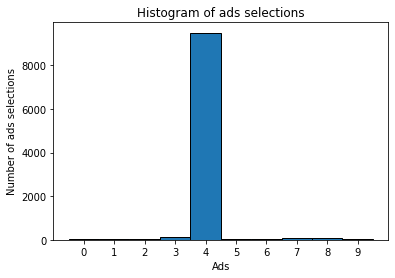

In [6]:
plt.hist(selected_ads, align='mid', bins=np.arange(number_of_ads + 1) - 0.5, edgecolor='black')
plt.title('Histogram of ads selections')
plt.xticks(range(number_of_ads))
plt.xlabel('Ads')
plt.ylabel('Number of ads selections')
plt.show()

In [7]:
total_reward

2613

Ads was clicked 2613 out of 10000 times, which is 26.1% of all

### Finding the optimal number of displayed ads, after which we found the most profitable one

In [11]:
selected_ads, total_reward = thompson_sampling_algorithm(dataset.iloc[:500], number_of_ads=number_of_ads)

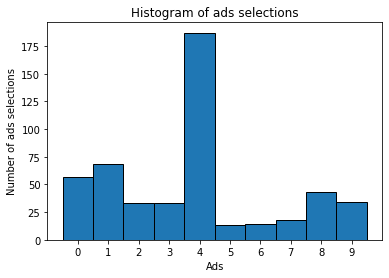

In [12]:
plt.hist(selected_ads, bins=np.arange(number_of_ads + 1) - 0.5, edgecolor='black')
plt.title('Histogram of ads selections')
plt.xticks(range(number_of_ads))
plt.xlabel('Ads')
plt.ylabel('Number of ads selections')
plt.show()

In [13]:
total_reward

93

After ~500 rounds we clearly found the optimal ad. 

Up till this time, ads was clicked 93 out of 500 times they were displayed, which is 18.6% of the times.

For comparison, starting from 500th round, up till the end, there were 9500 ads displayed and 2520 of them were clicked, which is 26.5% of the times.